In [2]:
from matplotlib.colors import ListedColormap

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

%matplotlib inline
# Make it pretty
plt.style.use('fivethirtyeight')
plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

In [3]:
comp = pd.read_csv("men_main_21.1.csv", na_values=['?'])
comp.head()

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (3,18) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Unnamed: 0,first_name,lastname,Placing,country,continent,Age,affiliate,Height and Weight,points,21.1,21.1 time,21.2,21.2 time,21.3,21.3 time,21.4,weight,Unnamed: 18
0,0,JEFFRE,ADLER,1,Canada,North America,Age 27,CrossFit Wonderland,69 in | 197 lb,101.0,20th (11:55),605 reps,8th (9:14),225 reps,27th (8:15),180 reps,46th (317 lbs),Weight lifted: 317 lbs.,NaN
1,1,SCOTT,PANCHIK,2,United States,North America,Age 33,CrossFit Mentality,69 in | 187 lb,141.0,33rd (12:25),605 reps,47th (9:52),225 reps,5th (7:48),180 reps,56th (316 lbs),Weight lifted: 316 lbs.,NaN
2,2,TRAVIS,MEAD,3,United States,North America,Age 34,Iron Valley CrossFit,73 in | 205 lb,165.0,87th (13:02),605 reps,24th (9:38),225 reps,48th (8:26),180 reps,6th (345 lbs),Weight lifted: 345 lbs.,NaN
3,3,SAXON,PANCHIK,4,United States,North America,Age 25,CrossFit Cliffside,69 in | 180 lb,217.0,5th (11:25),605 reps,68th (9:59),225 reps,87th (8:41),180 reps,57th (316 lbs),Weight lifted: 316 lbs.,NaN
4,4,RICHARD,FRONING JR.,5,United States,North America,Age 33,CrossFit Mayhem,69 in | 194 lb,254.0,58th (12:45),605 reps,91st (10:04),225 reps,5th (7:48),180 reps,100th (312 lbs),Weight lifted: 312 lbs.,NaN


In [4]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137464 entries, 0 to 137463
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         137464 non-null  int64  
 1   first_name         137463 non-null  object 
 2   lastname           137456 non-null  object 
 3   Placing            137464 non-null  object 
 4   country            137464 non-null  object 
 5   continent          137464 non-null  object 
 6   Age                137464 non-null  object 
 7   affiliate          112681 non-null  object 
 8   Height and Weight  87327 non-null   object 
 9   points             137463 non-null  float64
 10  21.1               137464 non-null  object 
 11  21.1 time          8238 non-null    object 
 12  21.2               137462 non-null  object 
 13  21.2 time          65789 non-null   object 
 14  21.3               137461 non-null  object 
 15  21.3 time          15202 non-null   object 
 16  21

In [5]:
compHW = comp[['lastname','Placing','Age','Height and Weight']]

In [6]:
compHW

,lastname,Placing,Age,Height and Weight
0,ADLER,1,Age 27,69 in | 197 lb
1,PANCHIK,2,Age 33,69 in | 187 lb
2,MEAD,3,Age 34,73 in | 205 lb
3,PANCHIK,4,Age 25,69 in | 180 lb
4,FRONING JR.,5,Age 33,69 in | 194 lb
...,...,...,...,...
137459,NORTON,137351,Age 31,NaN
137460,DOUGHTY,137351,Age 32,NaN
137461,ROTT,137351,Age 46,NaN
137462,RICHARDS,137351,Age 39,76 in | 205 lb


In [7]:
type(compHW['Height and Weight'])

pandas.core.series.Series

In [8]:
HWdf = compHW['Height and Weight'].str.split('|', expand=True)

In [9]:
HWdf

,0,1
0,69 in,197 lb
1,69 in,187 lb
2,73 in,205 lb
3,69 in,180 lb
4,69 in,194 lb
...,...,...
137459,NaN,NaN
137460,NaN,NaN
137461,NaN,NaN
137462,76 in,205 lb


In [10]:
HWdf = HWdf.rename({0:'Height', 1:'Weight'}, axis = 1 )

In [11]:
HWdf

,Height,Weight
0,69 in,197 lb
1,69 in,187 lb
2,73 in,205 lb
3,69 in,180 lb
4,69 in,194 lb
...,...,...
137459,NaN,NaN
137460,NaN,NaN
137461,NaN,NaN
137462,76 in,205 lb


In [12]:
compHW

,lastname,Placing,Age,Height and Weight
0,ADLER,1,Age 27,69 in | 197 lb
1,PANCHIK,2,Age 33,69 in | 187 lb
2,MEAD,3,Age 34,73 in | 205 lb
3,PANCHIK,4,Age 25,69 in | 180 lb
4,FRONING JR.,5,Age 33,69 in | 194 lb
...,...,...,...,...
137459,NORTON,137351,Age 31,NaN
137460,DOUGHTY,137351,Age 32,NaN
137461,ROTT,137351,Age 46,NaN
137462,RICHARDS,137351,Age 39,76 in | 205 lb


In [13]:
compHW = compHW.drop('Height and Weight', axis = 1)

In [14]:
compHW

,lastname,Placing,Age
0,ADLER,1,Age 27
1,PANCHIK,2,Age 33
2,MEAD,3,Age 34
3,PANCHIK,4,Age 25
4,FRONING JR.,5,Age 33
...,...,...,...
137459,NORTON,137351,Age 31
137460,DOUGHTY,137351,Age 32
137461,ROTT,137351,Age 46
137462,RICHARDS,137351,Age 39


In [15]:
compHW = compHW.join(HWdf)

In [16]:
compHW.head(50)

,lastname,Placing,Age,Height,Weight
0,ADLER,1,Age 27,69 in,197 lb
1,PANCHIK,2,Age 33,69 in,187 lb
2,MEAD,3,Age 34,73 in,205 lb
3,PANCHIK,4,Age 25,69 in,180 lb
4,FRONING JR.,5,Age 33,69 in,194 lb
5,OHLSEN,6,Age 30,67 in,190 lb
6,COURNOYER,7,Age 25,180 cm,205 lb
7,GREASHABER,8,Age 21,72 in,206 lb
8,RICHELME,9,Age 24,173 cm,83 kg
9,LASCENKO,10,Age 23,175 cm,92 kg


In [17]:
agecompHW = compHW['Age'].apply(lambda x: "".join([char for char in str(x) if char.isnumeric()]))

In [18]:
compHW['Age2']=agecompHW

In [19]:
compHW = compHW.drop(labels = 'Age', axis = 1)

In [20]:
compHW = compHW.dropna(axis=0, how='any')

In [21]:
#compHW=compHW.reset_index()

In [22]:
#compHW = compHW.drop(labels = 'index', axis = 1)

In [23]:
compHW 

,lastname,Placing,Height,Weight,Age2
0,ADLER,1,69 in,197 lb,27
1,PANCHIK,2,69 in,187 lb,33
2,MEAD,3,73 in,205 lb,34
3,PANCHIK,4,69 in,180 lb,25
4,FRONING JR.,5,69 in,194 lb,33
...,...,...,...,...,...
137452,PESANT,137351,76 in,225 lb,44
137453,SCHMIDT,137351,180 cm,91 kg,29
137456,SUMNER,137351,73 in,215 lb,36
137457,SVITEK,137351,187 cm,83 kg,29


In [24]:
compHW = compHW[compHW["Height"].str.contains("cm")==False]

In [25]:
compHW = compHW[compHW["Weight"].str.contains("kg")==False]

In [26]:
compHW=compHW.reset_index()

In [27]:
compHW.head(50)

,index,lastname,Placing,Height,Weight,Age2
0,0,ADLER,1,69 in,197 lb,27
1,1,PANCHIK,2,69 in,187 lb,33
2,2,MEAD,3,73 in,205 lb,34
3,3,PANCHIK,4,69 in,180 lb,25
4,4,FRONING JR.,5,69 in,194 lb,33
5,5,OHLSEN,6,67 in,190 lb,30
6,7,GREASHABER,8,72 in,206 lb,21
7,10,LAPOINTE,11,69 in,187 lb,24
8,15,COLLINS,16,67 in,182 lb,30
9,17,MERTENS,18,64 in,185 lb,23


In [28]:
heightcompHW = compHW['Height'].apply(lambda x: "".join([char for char in str(x) if char.isnumeric()]))

In [29]:
compHW['Height2']=heightcompHW

In [30]:
weightcompHW = compHW['Weight'].apply(lambda x: "".join([char for char in str(x) if char.isnumeric()]))

In [31]:
compHW['Weight2']=weightcompHW

In [32]:
compHW = compHW.drop(labels = 'Height', axis = 1)

In [33]:
compHW = compHW.drop(labels = 'Weight', axis = 1)

In [34]:
compHW = compHW.drop(labels = 'index', axis = 1)

In [35]:
compHW = compHW.rename(columns={"Age2": "Age", "Height2": "Height", "Weight2":"Weight", "lastname":"Name"})

In [36]:
compHW['Placing'] = pd.to_numeric(compHW['Placing'])

In [37]:
compHW['Age'] = pd.to_numeric(compHW['Age'])

In [38]:
compHW['Height'] = pd.to_numeric(compHW['Height'])

In [39]:
compHW['Weight'] = pd.to_numeric(compHW['Weight'])

In [40]:
compHW.head(50)

,Name,Placing,Age,Height,Weight
0,ADLER,1,27,69,197
1,PANCHIK,2,33,69,187
2,MEAD,3,34,73,205
3,PANCHIK,4,25,69,180
4,FRONING JR.,5,33,69,194
5,OHLSEN,6,30,67,190
6,GREASHABER,8,21,72,206
7,LAPOINTE,11,24,69,187
8,COLLINS,16,30,67,182
9,MERTENS,18,23,64,185


In [41]:
compHW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43587 entries, 0 to 43586
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     43587 non-null  object
 1   Placing  43587 non-null  int64 
 2   Age      43587 non-null  int64 
 3   Height   43587 non-null  int64 
 4   Weight   43587 non-null  int64 
dtypes: int64(4), object(1)
memory usage: 1.7+ MB


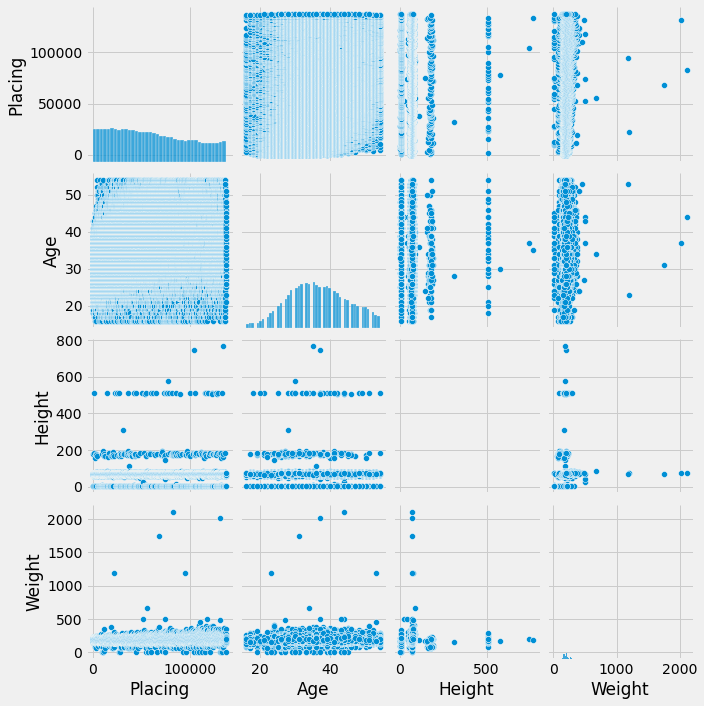

In [42]:
sns.pairplot(compHW)

In [43]:
range1720_df = compHW.loc[(compHW['Age'] == '17') & 
                         (compHW['Age'] == '18') & 
                         (compHW['Age'] == '19')&
                         (compHW['Age'] == '20')]

In [44]:
range1720_df

,Name,Placing,Age,Height,Weight


In [45]:
range1720_df = compHW['Age'].drop(lambda x: "".join([char for char in str(x) if char.isnumeric()]))

KeyError: '[<function <lambda> at 0x7fdb4bb75160>] not found in axis'

In [ ]:
compHW[compHW['Age'].isin([17,18,19,20])]

In [47]:
#compHW = compHW['Height'].isin(range([58,70]))

TypeError: 'list' object cannot be interpreted as an integer

In [115]:
compHW

0         True
1         True
2        False
3         True
4         True
         ...  
43582    False
43583     True
43584    False
43585    False
43586    False
Name: Height, Length: 43587, dtype: bool

In [46]:
compHW[compHW['Height'].isin([18,19,20])]

SyntaxError: invalid syntax (1065353693.py, line 1)

In [95]:
range1720_df = compHW[compHW['Age'].isin([17,18,19,20])]

In [96]:
range1720_df

,Name,Placing,Age,Height,Weight
49,PEPPER,95,19,72,212
83,SPRAGUE,171,19,74,210
106,EWING,230,20,71,195
167,KUC,391,18,72,175
217,LEAHY,533,20,71,185
...,...,...,...,...,...
43365,CUSCUL,136586,18,69,159
43383,ROBICHAUD,136586,17,71,175
43484,LEE,136916,19,6,208
43502,RODRIGUEZ,136916,20,69,165


In [97]:
range1720_df['Height'].max()

511

In [98]:
range2127_df = compHW[compHW['Age'].isin([21,22,23,24,25,26,27])]

In [99]:
range2127_df

,Name,Placing,Age,Height,Weight
0,ADLER,1,27,69,197
3,PANCHIK,4,25,69,180
6,GREASHABER,8,21,72,206
7,LAPOINTE,11,24,69,187
9,MERTENS,18,23,64,185
...,...,...,...,...,...
43552,BACKMAN,137351,26,70,185
43557,DEWOLFE,137351,26,72,180
43567,PANAGIOTOU,137351,23,63,152
43576,TAVENNER,137351,26,73,205


In [100]:
range2839_df = compHW[compHW['Age'].isin([28,29,30,31,32,33,34,35,36,37,38,39])]

In [101]:
range2839_df

,Name,Placing,Age,Height,Weight
1,PANCHIK,2,33,69,187
2,MEAD,3,34,73,205
4,FRONING JR.,5,33,69,194
5,OHLSEN,6,30,67,190
8,COLLINS,16,30,67,182
...,...,...,...,...,...
43578,CROSS,137351,28,72,205
43580,FOLTZ,137351,38,71,165
43582,SHANKER,137351,38,70,180
43585,SUMNER,137351,36,73,215


In [102]:
range2839_df.describe()

,Placing,Age,Height,Weight
count,21385.000000,21385.000000,21385.000000,21385.000000
mean,55466.207762,33.652326,70.615759,191.922937
std,38910.845954,3.351829,17.787521,31.927073
min,2.000000,28.000000,1.000000,1.000000
25%,22008.000000,31.000000,69.000000,175.000000
50%,48093.000000,34.000000,70.000000,190.000000
75%,85337.000000,36.000000,72.000000,205.000000
max,137351.000000,39.000000,769.000000,2015.000000
